In [ ]:
# Define your movie and trailer file paths here
movie_files = [
    '/content/drive/MyDrive/Downloaded_Audio/ChairM.wav',
    '/content/drive/MyDrive/Downloaded_Audio/CouchM.wav',
    '/content/drive/MyDrive/Downloaded_Audio/ElevatorM.wav',
    '/content/drive/MyDrive/Downloaded_Audio/StuccoM.wav',
    '/content/drive/MyDrive/Downloaded_Audio/SushiNohM.wav',
    '/content/drive/MyDrive/Downloaded_Audio/IVOYM.wav',
    '/content/drive/MyDrive/Downloaded_Audio/NightVisitM.wav',
    '/content/drive/MyDrive/Downloaded_Audio/PlayMeM.wav',
    '/content/drive/MyDrive/Downloaded_Audio/TheBottomM.wav',
    '/content/drive/MyDrive/Downloaded_Audio/UntilDeathM.wav'

]

trailer_files = [
    '/content/drive/MyDrive/Downloaded_Audio/ChairT.wav',
    '/content/drive/MyDrive/Downloaded_Audio/CouchT.wav',
    '/content/drive/MyDrive/Downloaded_Audio/ElevatorT.wav',
    '/content/drive/MyDrive/Downloaded_Audio/StuccoT.wav',
    '/content/drive/MyDrive/Downloaded_Audio/SushiNohT.wav',
    '/content/drive/MyDrive/Downloaded_Audio/IVOYT.wav',
    '/content/drive/MyDrive/Downloaded_Audio/NightVisitT.wav',
    '/content/drive/MyDrive/Downloaded_Audio/PlayMeT.wav',
    '/content/drive/MyDrive/Downloaded_Audio/TheBottomT.wav',
    '/content/drive/MyDrive/Downloaded_Audio/UntilDeathT.wav'

]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

In [ ]:
#TO EXTRACT THE AUDIO IN WAV FORM FROM THE YOUTUBE VIDEO LINK AND SAVE IT TO GOOGLE DRIVE
from __future__ import unicode_literals
import yt_dlp as youtube_dl
import shutil
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the URLs for movies and trailers
movie_urls = [
    'https://youtu.be/S8bn4W-XU4Y?si=_qQr0cPBmdXsdb9F',
    'https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.youtube.com/watch%3Fv%3DBUGMiBZVdOs&ved=2ahUKEwjsgvawlYyFAxUw7DgGHckWCh0QwqsBegQIJBAF&usg=AOvVaw2ER2gqx0HWJMZwa6aDNMo3',
    'https://youtu.be/4sH5vW71HOw?si=_WpM7xUJIAVbt4wU',
    'https://youtu.be/-WvsD4WL8-Y?si=6_WvAtpxhynZ7UIZ'
]

trailer_urls = [
    'https://youtu.be/va5lqMxyFA0?si=OlZei3DncPTBaHH9',
    'https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.youtube.com/watch%3Fv%3DcZK1bBgMp4s&ved=2ahUKEwjsgvawlYyFAxUw7DgGHckWCh0QwqsBegQIQRAG&usg=AOvVaw1CSYtFe0msSIyp0rT0bw-9',
    'https://youtu.be/Ln3XBqrwbok?si=P6JYiynU4G3_BVIM',
    'https://youtu.be/Cp09BEYyUyU?si=wgsiwHxrboWqewL9'
]

# Define common options for downloading audio
ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '192',
    }],
}

# Directory for downloaded files
download_dir = '/content/downloads'
os.makedirs(download_dir, exist_ok=True)

# Function to download audio from a list of URLs
def download_audio(urls, category):
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        for url in urls:
            try:
                print(f"Downloading {category} from: {url}")
                ydl.download([url])
            except Exception as e:
                print(f"An error occurred while downloading {url}: {e}")

# Download movies and trailers
download_audio(movie_urls, 'movie')
download_audio(trailer_urls, 'trailer')

# Move downloaded files to the designated directory
def move_files_to_dir(src_dir, dest_dir):
    for file_name in os.listdir(src_dir):
        full_file_name = os.path.join(src_dir, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, os.path.join(dest_dir, file_name))

# Move downloaded files
move_files_to_dir('/content', download_dir)

# Define the path to your Google Drive folder
drive_folder = '/content/drive/My Drive/Downloaded_Audio'
os.makedirs(drive_folder, exist_ok=True)

# Move files from the local download directory to Google Drive
move_files_to_dir(download_dir, drive_folder)

print("Files have been successfully uploaded to Google Drive.")


### PREPROCESSING THE TRAINING DATA


In [ ]:
# 1. Splitting the audio into smaller segments of size 10 secs
def split_audio_into_segments(audio_file, segment_length=10):
    y, sr = librosa.load(audio_file, sr=None)
    segment_samples = segment_length * sr
    num_segments = len(y) // segment_samples
    segments = [y[i * segment_samples:(i + 1) * segment_samples] for i in range(num_segments)]
    return segments, sr



*  n_mels : 128 Mel Bands * 862
*  n_mfcc : 20 MFCC features * 862




In [ ]:
# extract mel and MFCC features for each segment
# ensures consistent shape by padding the array
import librosa
import numpy as np

def extract_features(segments, sr, n_mfcc=20, n_mels=128, max_length=862):
    mfcc_features = []
    mel_features = []
    for segment in segments:
        mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=n_mfcc)
        mel = librosa.feature.melspectrogram(y=segment, sr=sr, n_mels=n_mels)

        # Ensure consistent shape
        if mfcc.shape[1] < max_length:
            mfcc = np.pad(mfcc, ((0, 0), (0, max_length - mfcc.shape[1])), mode='constant')
        else:
            mfcc = mfcc[:, :max_length]

        if mel.shape[1] < max_length:
            mel = np.pad(mel, ((0, 0), (0, max_length - mel.shape[1])), mode='constant')
        else:
            mel = mel[:, :max_length]

        mfcc_features.append(mfcc)
        mel_features.append(mel)
    return np.array(mfcc_features), np.array(mel_features)


In [ ]:
#consolidate the mel and mfcc features for all movies and trailers
def process_movies_and_trailers(movie_files, trailer_files):
    all_mfcc_movie, all_mel_movie = [], []
    all_mfcc_trailer, all_mel_trailer = [], []

    for movie_file in movie_files:
        movie_segments, sr_movie = split_audio_into_segments(movie_file)
        movie_mfcc, movie_mel = extract_features(movie_segments, sr_movie)
        all_mfcc_movie.append(movie_mfcc)
        all_mel_movie.append(movie_mel)

    for trailer_file in trailer_files:
        trailer_segments, sr_trailer = split_audio_into_segments(trailer_file)
        trailer_mfcc, trailer_mel = extract_features(trailer_segments, sr_trailer)
        all_mfcc_trailer.append(trailer_mfcc)
        all_mel_trailer.append(trailer_mel)

    all_mfcc_movie = np.concatenate([arr for arr in all_mfcc_movie], axis=0)
    all_mel_movie = np.concatenate([arr for arr in all_mel_movie], axis=0)
    all_mfcc_trailer = np.concatenate([arr for arr in all_mfcc_trailer], axis=0)
    all_mel_trailer = np.concatenate([arr for arr in all_mel_trailer], axis=0)

    return all_mfcc_movie, all_mel_movie, all_mfcc_trailer, all_mel_trailer


In [ ]:
# take each segment as anchor and append similar trailer segment as 1 and dissimilar as 0
def prepare_triplet_data(all_mfcc_movie, all_mel_movie, all_mfcc_trailer, all_mel_trailer):
    anchors, positives, labels = [], [], []

    num_movies = len(all_mfcc_movie)
    num_trailers = len(all_mfcc_trailer)

    for i in range(num_movies):
        for j in range(len(all_mfcc_movie[i])):
            anchors.append(all_mfcc_movie[i][j])
            positives.append(all_mfcc_trailer[j % num_trailers])
            labels.append(1)  # Positive pair

    for i in range(num_trailers):
        for j in range(len(all_mfcc_trailer[i])):
            anchors.append(all_mfcc_trailer[i][j])
            positives.append(all_mfcc_movie[j % num_movies])
            labels.append(0)  # Negative pair

    anchors = np.array(anchors)
    positives = np.array(positives)
    labels = np.array(labels)

    # Reshape anchors to match positives shape
    anchors = np.expand_dims(anchors, axis=-1)  # Add channel dimension
    anchors = np.repeat(anchors, repeats=20, axis=1)  # Repeat along the time axis

    return anchors, positives, labels


### BUILDING THE MODEL

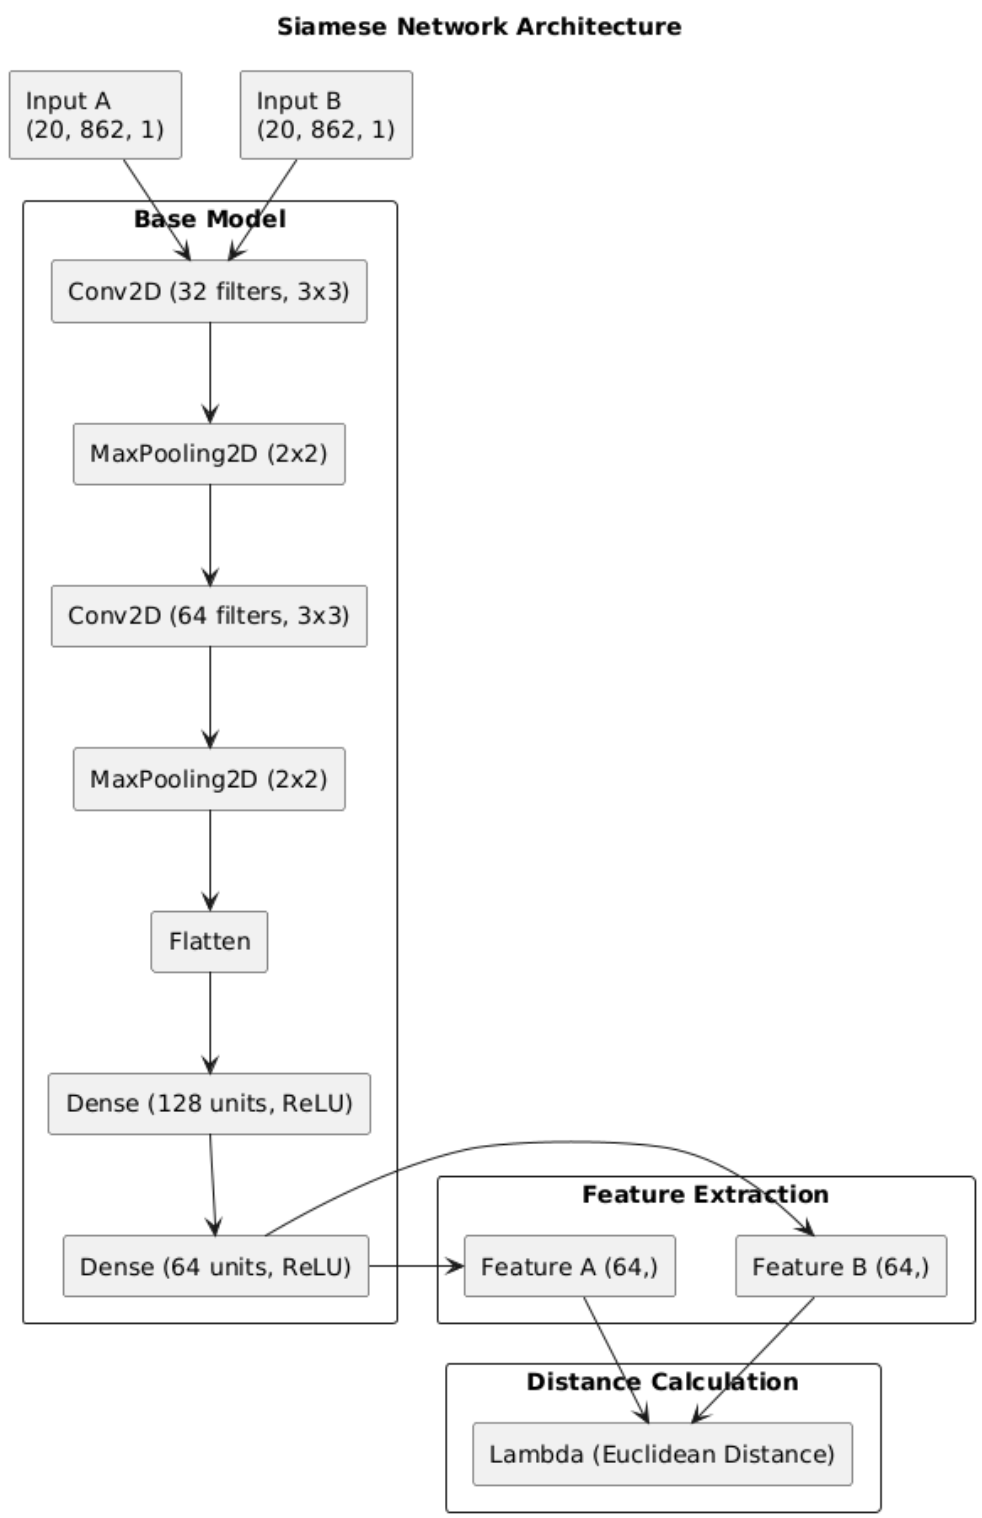

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model

# Define the Siamese network
def create_siamese_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    model = Model(inputs=input, outputs=x)
    return model

def create_siamese_model(input_shape):
    base_model = create_siamese_network(input_shape)

    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)

    feature_a = base_model(input_a)
    feature_b = base_model(input_b)

    # Lambda layer with explicitly defined output shape
    distance = Lambda(lambda tensors: tf.sqrt(tf.reduce_sum(tf.square(tensors[0] - tensors[1]), axis=1, keepdims=True)),
                      output_shape=(1,))([feature_a, feature_b])

    model = Model(inputs=[input_a, input_b], outputs=distance)
    return model

# Define the input shape for the model
input_shape = (20, 862, 1)  # Example shape; adjust according to your data

# Create the Siamese model
siamese_model = create_siamese_model(input_shape)

In [ ]:
# Compile the model with contrastive loss
def contrastive_loss(margin=1):
    def loss(y_true, y_pred):
        return tf.reduce_mean((1 - y_true) * tf.square(y_pred) + y_true * tf.square(tf.maximum(margin - y_pred, 0)))
    return loss

siamese_model.compile(optimizer='adam', loss=contrastive_loss(margin=1))
# Prepare your data
anchors = np.random.rand(11360, 20, 862)
positives = np.random.rand(11360, 20, 862)
labels = np.random.randint(0, 2, size=(11360,))

# Reshape data to ensure it fits the model
anchors = np.expand_dims(anchors, axis=-1)  # Add channel dimension to anchors
positives = np.expand_dims(positives, axis=-1)  # Add channel dimension to positives

# Train the model
siamese_model.fit(
    [anchors, positives],
    labels,
    epochs=6,
    batch_size=32
)

# Save the model in .h5 format after training is complete
siamese_model.save('siamese_model_final.h5')
print("Model saved in .h5 format at siamese_model_final.h5")

In [ ]:
# Save only the weights
siamese_model.save_weights('siamese_model.weights.h5')

In [ ]:
import numpy as np
import tensorflow as tf

# Load the weights into the model
weights_path = '/content/siamese_model.weights.h5'
siamese_model.load_weights(weights_path)


In [ ]:
# Print the model summary to understand the expected input shapes
siamese_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 20, 862, 1)     │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 20, 862, 1)     │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 64)             │      8,833,600 │ input_layer_1[0][0],   │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 1)              │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,833,600 (33.70 MB)

 Trainable params: 8,833,600 (33.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import pandas as pd
import librosa

def extract_features(segments, sr, n_mfcc=20, n_mels=20, max_length=862):
    mfcc_features = []
    mel_features = []
    for segment in segments:
        # Extract MFCCs and Mel spectrogram features
        mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=n_mfcc)
        mel = librosa.feature.melspectrogram(y=segment, sr=sr, n_mels=n_mels)

        # Ensure MFCCs have shape (n_mfcc, max_length)
        if mfcc.shape[1] < max_length:
            mfcc = np.pad(mfcc, ((0, 0), (0, max_length - mfcc.shape[1])), mode='constant')
        else:
            mfcc = mfcc[:, :max_length]

        # Ensure Mel spectrograms have shape (n_mels, max_length)
        if mel.shape[1] < max_length:
            mel = np.pad(mel, ((0, 0), (0, max_length - mel.shape[1])), mode='constant')
        else:
            mel = mel[:, :max_length]

        mfcc_features.append(mfcc)
        mel_features.append(mel)

    # Convert lists to numpy arrays
    mfcc_features = np.array(mfcc_features)
    mel_features = np.array(mel_features)

    # Reshape to match model input shape
    mfcc_features = mfcc_features.reshape(-1, n_mfcc, max_length, 1)
    mel_features = mel_features.reshape(-1, n_mels, max_length, 1)

    return mfcc_features, mel_features

# Example usage
# Load and preprocess the new movie audio
segments, sr = split_audio_into_segments("/content/InTheDarkA.mp3")
mfcc_features, mel_features = extract_features(segments, sr)

# Make predictions using the loaded model
predicted_features = siamese_model.predict([mfcc_features, mel_features])

# Flatten features if necessary
predicted_embeddings = predicted_features.reshape(predicted_features.shape[0], -1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step


In [ ]:
predicted_embeddings

array([[ 905.9572 ],
       [ 732.7431 ],
       [ 680.91187],
       [ 819.83344],
       [ 803.4838 ],
       [ 708.0747 ],
       [ 821.42474],
       [1054.3519 ],
       [1040.1432 ],
       [ 985.9316 ],
       [ 933.1506 ],
       [1186.5144 ],
       [1065.5428 ],
       [1170.7935 ],
       [1125.3911 ],
       [1002.686  ],
       [1056.6514 ],
       [1149.2947 ],
       [1031.168  ],
       [1040.942  ],
       [1234.2251 ],
       [1281.5487 ],
       [1177.2988 ],
       [1048.837  ],
       [1176.7393 ],
       [1040.1359 ],
       [ 875.243  ],
       [ 847.8918 ],
       [ 843.167  ],
       [ 886.9346 ],
       [ 883.6131 ],
       [ 943.047  ],
       [ 883.82733],
       [ 838.1497 ],
       [1179.9323 ],
       [1178.698  ],
       [ 839.4312 ],
       [ 678.36694],
       [ 797.492  ],
       [1015.3679 ],
       [1182.6515 ],
       [1239.2152 ],
       [1053.0277 ],
       [ 958.7026 ],
       [1035.7673 ],
       [1118.23   ],
       [1087.2249 ],
       [1093.

In [ ]:
!pip install scikit-learn


In [ ]:
predicted_scores = np.random.rand(len(predicted_embeddings))  # Replace this with your actual scores
score_threshold = 0.10 # Define your threshold for segment worthiness

# Get trailer-worthy segments based on the score threshold
def get_trailer_worthy_segments_by_score(predicted_scores, segment_duration=5, threshold=score_threshold):
    trailer_segments = []

    for idx, score in enumerate(predicted_scores):
        if score >= threshold:
            start_time = idx * segment_duration
            end_time = start_time + segment_duration
            trailer_segments.append((start_time, end_time))

    return trailer_segments

# Get trailer-worthy segments
trailer_segments = get_trailer_worthy_segments_by_score(predicted_scores)

# Print and save segments as before
if trailer_segments:
    print("Diverse trailer-worthy segments (start time, end time) in seconds:")
    for segment in trailer_segments:
        print(f"Start: {segment[0]}s, End: {segment[1]}s")
    df = pd.DataFrame(trailer_segments, columns=['Start Time (s)', 'End Time (s)'])
    df.to_csv('trailer_worthy_segments.csv', index=False)
else:
    print("No trailer-worthy segments identified.")


Diverse trailer-worthy segments (start time, end time) in seconds:
Start: 0s, End: 5s
Start: 5s, End: 10s
Start: 10s, End: 15s
Start: 15s, End: 20s
Start: 20s, End: 25s
Start: 25s, End: 30s
Start: 30s, End: 35s
Start: 35s, End: 40s
Start: 40s, End: 45s
Start: 45s, End: 50s
Start: 50s, End: 55s
Start: 55s, End: 60s
Start: 60s, End: 65s
Start: 65s, End: 70s
Start: 70s, End: 75s
Start: 75s, End: 80s
Start: 80s, End: 85s
Start: 85s, End: 90s
Start: 90s, End: 95s
Start: 95s, End: 100s
Start: 100s, End: 105s
Start: 105s, End: 110s


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
num_clusters = 8  # Adjust this based on your audio data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(predicted_embeddings)

# Get cluster labels for each segment
labels = kmeans.labels_

# Function to extract segments from different clusters
def get_trailer_worthy_segments(labels, segment_duration=5, segments_per_cluster=2):
    trailer_segments = []

    for cluster in np.unique(labels):
        cluster_indices = np.where(labels == cluster)[0]

        # Randomly select a specified number of segments from each cluster
        selected_indices = np.random.choice(cluster_indices,
                                             size=min(segments_per_cluster, len(cluster_indices)),
                                             replace=False)

        for idx in selected_indices:
            start_time = idx * segment_duration
            end_time = (idx + 1) * segment_duration
            trailer_segments.append((start_time, end_time))

    return trailer_segments

# Get diverse trailer-worthy timestamps with start and end times
trailer_segments = get_trailer_worthy_segments(labels, segments_per_cluster=4)

# Print trailer-worthy timestamps with start and end times
print("Diverse trailer-worthy segments (start time, end time) in seconds:")
for segment in trailer_segments:
    print(f"Start: {segment[0]}s, End: {segment[1]}s")

# Save the trailer-worthy segments to a CSV file
df = pd.DataFrame(trailer_segments, columns=['Start Time (s)', 'End Time (s)'])
df.to_csv('trailer_worthy_segments.csv', index=False)

print("Diverse trailer-worthy segments have been saved to 'trailer_worthy_segments.csv'.")

Diverse trailer-worthy segments (start time, end time) in seconds:
Start: 0s, End: 5s
Start: 360s, End: 365s
Start: 415s, End: 420s
Start: 405s, End: 410s
Start: 350s, End: 355s
Start: 320s, End: 325s
Start: 225s, End: 230s
Start: 355s, End: 360s
Start: 10s, End: 15s
Start: 285s, End: 290s
Start: 305s, End: 310s
Start: 370s, End: 375s
Start: 315s, End: 320s
Start: 220s, End: 225s
Start: 125s, End: 130s
Start: 365s, End: 370s
Start: 105s, End: 110s
Start: 255s, End: 260s
Start: 385s, End: 390s
Start: 100s, End: 105s
Start: 160s, End: 165s
Start: 30s, End: 35s
Start: 180s, End: 185s
Start: 140s, End: 145s
Start: 65s, End: 70s
Start: 330s, End: 335s
Start: 170s, End: 175s
Start: 275s, End: 280s
Start: 380s, End: 385s
Start: 375s, End: 380s
Diverse trailer-worthy segments have been saved to 'trailer_worthy_segments.csv'.


In [ ]:
import librosa
import numpy as np

def split_audio_into_segments(audio_file, segment_duration=5):
    """
    Splits an audio file into 5-second segments.
    """
    y, sr = librosa.load(audio_file, sr=None)
    num_segments = len(y) // (sr * segment_duration)
    segments = [y[i * sr * segment_duration:(i + 1) * sr * segment_duration] for i in range(num_segments)]
    return segments, sr

audio_file = "/content/inTheDarkA.mp3"  # Replace with your movie file path
segments, sr = split_audio_into_segments(audio_file)


In [ ]:
import librosa

def extract_features(segments, sr, n_mfcc=20, n_mels=20, max_length=862):
    """
    Extracts MFCC and Mel spectrogram features from each segment.
    """
    mfcc_features = []
    mel_features = []
    for segment in segments:
        # Extract MFCCs and Mel spectrogram features
        mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=n_mfcc)
        mel = librosa.feature.melspectrogram(y=segment, sr=sr, n_mels=n_mels)

        # Ensure MFCCs have shape (n_mfcc, max_length)
        if mfcc.shape[1] < max_length:
            mfcc = np.pad(mfcc, ((0, 0), (0, max_length - mfcc.shape[1])), mode='constant')
        else:
            mfcc = mfcc[:, :max_length]

        # Ensure Mel spectrograms have shape (n_mels, max_length)
        if mel.shape[1] < max_length:
            mel = np.pad(mel, ((0, 0), (0, max_length - mel.shape[1])), mode='constant')
        else:
            mel = mel[:, :max_length]

        mfcc_features.append(mfcc)
        mel_features.append(mel)

    # Convert lists to numpy arrays
    mfcc_features = np.array(mfcc_features)
    mel_features = np.array(mel_features)

    # Reshape to match model input shape
    mfcc_features = mfcc_features.reshape(-1, n_mfcc, max_length, 1)
    mel_features = mel_features.reshape(-1, n_mels, max_length, 1)

    return mfcc_features, mel_features

mfcc_features, mel_features = extract_features(segments, sr)
